In [ ]:
### Author: Tammali Tharun(IITM, department of chemical engineering)

# Blackjack using MC methods

In [2]:
import gym
from gym import envs
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib import cm
from collections import defaultdict
from IPython.display import clear_output
%matplotlib inline
import numpy as np
import gym
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

### The agent only has 2 options
- 0 - Stick
- 1 - Hit


In [10]:
def get_obs(env):
    l = (new_state, reward, done, info, emp) = env.step(0)
    return l[0]
    
print(env.step(0))

((5, 1, False), -1.0, True, False, {})


# On policy MC control

In [4]:
def policy_greedy(Q,epsilon,curr_state,env):
    best_action = np.argmax(Q[curr_state])
    A = np.ones(env.action_space.n, dtype=np.float32) * epsilon / env.action_space.n
    A[best_action]+= 1.0 - epsilon
    # print(A)
    return A    
    

In [11]:

def on_pol_mc_control(env, episodes, discount_factor, epsilon):
    n_actions = env.action_space.n
    Q = {}
    N = {}  # Counter for number of visits
    G = {}  # Sum of returns

    for i in range(episodes):
        episode = []
        reset = env.reset()
        state = get_obs(env)
        visit_status = {}
        T = 100
        for t in range(T):  
            if(state not in Q):
                Q[state] = np.zeros(n_actions)

            
            action_prob = policy_greedy(Q,epsilon,state,env)
            action = np.random.choice(np.arange(env.action_space.n), p=action_prob)
            
            new_state, reward, done, info, emp = env.step(action)
            episode.append((state, action, reward))
            visit_status[(state, action)] = False
            
            if done:
                break
            state = new_state

        G_t = 0
        # print("Episode-",episode)
        # print("---------------------------------------------------")
        for t in reversed(range(len(episode))):
            state, action, reward = episode[t]

            #First visit
            if visit_status[(state, action)] == False:
                visit_status[(state, action)] = True
                if (state, action) not in N:
                    N[(state, action)] = 0
                    G[(state, action)] = 0
                N[(state, action)] += 1
                #Discounted return
                G_t = reward + discount_factor * G_t
                G[(state, action)] += G_t
            Q[state][action] = G[(state, action)] / N[(state, action)]
    return Q

# create environment
env = gym.make('Blackjack-v1')

# Parameters
episodes = 50000
discount_factor = 0.9
epsilon = 0.01

Q = on_pol_mc_control(env, episodes, discount_factor, epsilon)
env.close()
print("!!! Done !!!")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


!!! Done !!!


### Optimal policy

- After training for **50,000 episodes** for **On-policy MC control.**
- I have successfully derived an optimal policy for playing Blackjack game.
- Below is the recorded optimal policy, which outlines the best actions to take in various game scenarios to achieve the highest possible return.
- This policy is a result of thorough exploration and exploitation, ensuring that it provides a robust strategy for playing Blackjack game effectively.

In [12]:
optimal_policy = {}
for state, actions in Q.items():
    optimal_policy[state] = np.argmax(actions)

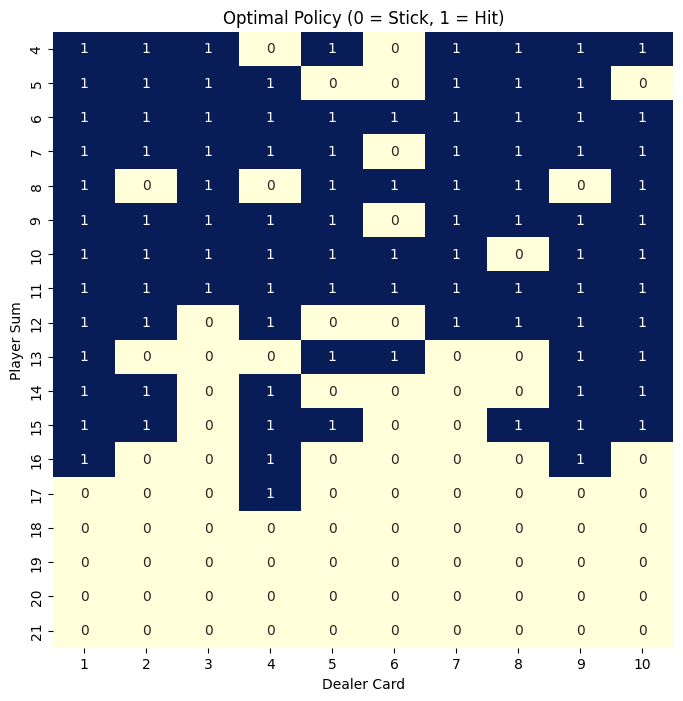

In [13]:
player_sums = range(4, 22)
dealer_cards = range(1, 11)
heatmap_data = np.zeros((len(player_sums), len(dealer_cards)))

for state, action in optimal_policy.items():
    player_sum, dealer_card, usable_ace = state
    if not usable_ace:
        heatmap_data[player_sum-4, dealer_card-1] = action

plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, cbar=False, xticklabels=dealer_cards, yticklabels=player_sums)
plt.xlabel('Dealer Card')
plt.ylabel('Player Sum')
plt.title('Optimal Policy (0 = Stick, 1 = Hit)')
plt.show()